<a href="https://colab.research.google.com/github/2bahaa/cats-and-dogs-Classifier-Using-CNN/blob/main/CatsVSDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models

import matplotlib.pyplot as plt
import numpy as np


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [4]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()   #split data into testing and training , load data


#pre-processing data
train_images=train_images/255.0
test_images=test_images/255.0

#define classes
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']




170498071/170498071 [==============================] - 4s 0us/step


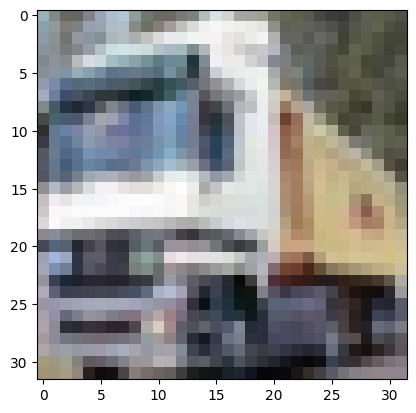

In [7]:
index_images=1   #change index to view different images
plt.imshow(train_images[index_images])

In [8]:
#build model  by stacking multipule layers to extract Features

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [11]:
#add dense layers
model.add(layers.Flatten())                   #flattening the data (64*4*4=1024)
model.add(layers.Dense(64,activation='relu')) #dense layer with 64 neurons
model.add(layers.Dense(10))                   #as we have 10 classes


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [12]:
#compile model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

#train model
history=model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 66s 41ms/step - loss: 1.5827 - accuracy: 0.4147
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.2098 - accuracy: 0.5656
Epoch 3/10
1563/1563 [==============================] - 60s 39ms/step - loss: 1.0305 - accuracy: 0.6344
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9215 - accuracy: 0.6733
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8472 - accuracy: 0.7021
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7820 - accuracy: 0.7251
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7264 - accuracy: 0.7446
Epoch 8/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6817 - accuracy: 0.7607
Epoch 9/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.6384 - accuracy: 0.7767
Epoch 10/10
1563/1563 [==============================] - 59s 38m

In [13]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print(test_acc)

313/313 - 3s - loss: 0.8579 - accuracy: 0.7129 - 3s/epoch - 11ms/step
0.7128999829292297


313/313 [==============================] - 3s 11ms/step
[-3.1386294  -2.6640234  -1.6952064   3.7878811  -2.4393485   1.4453282
 -2.668586   -0.4107643  -0.49884233 -3.1346226 ]
frog


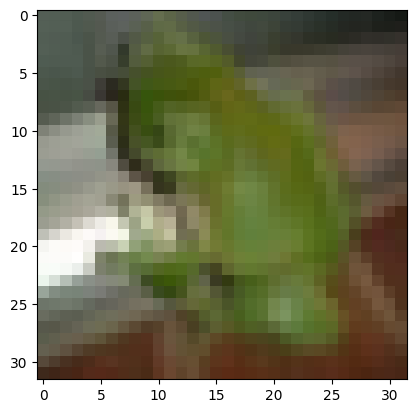

In [17]:
predictions=model.predict(test_images)

print(predictions[0])

print(class_names[np.argmax(predictions[7])])
plt.imshow(test_images[7])

In [5]:
# to achieve a higher accuracy we can increase data size by using data augemntation
#or we can use a pre-trained model as the base layer and add the classifier we want
#now we are going to use a pre-trained model from Google called MOBILENET V2 it was trained with 1.4 Million images with 1000 classes

In [1]:
#Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

In [4]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

#split data into 80% training 10%testing and 10% validation
(raw_train,raw_validation,raw_test),metadata=tfds.load('cats_vs_dogs',split=['train[:80%]','train[80%:90%]','train[90%:]']
                                                       ,with_info=True,
                                                       as_supervised=True)

In [28]:
#pre-processing data
IMG_size=160

def format_image(image,label):
  image=tf.cast(image,tf.float32)
  image=(image/127.5)-1
  image=tf.image.resize(image,(IMG_size,IMG_size))
  return image,label

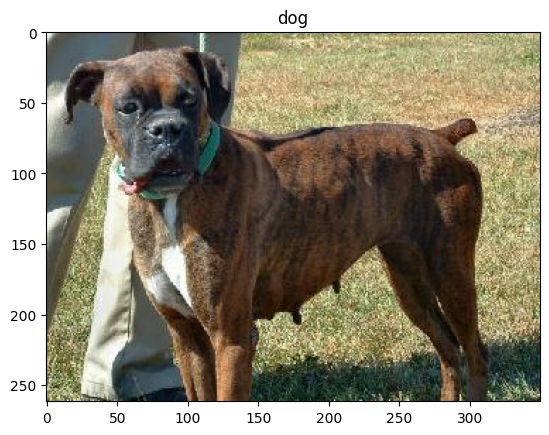

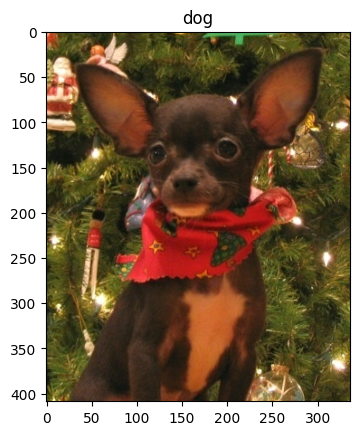

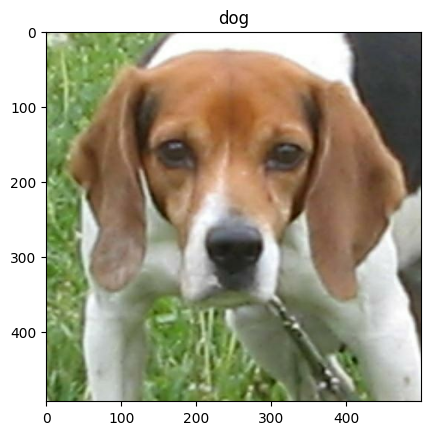

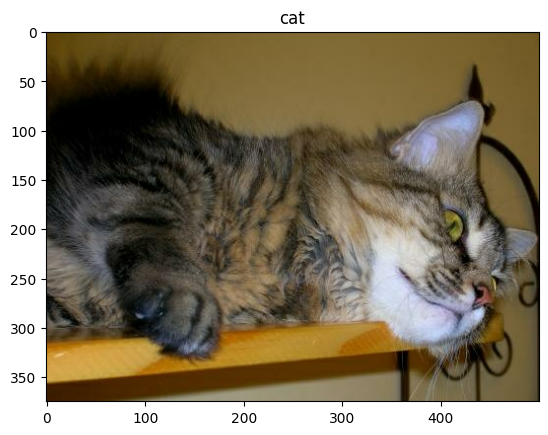

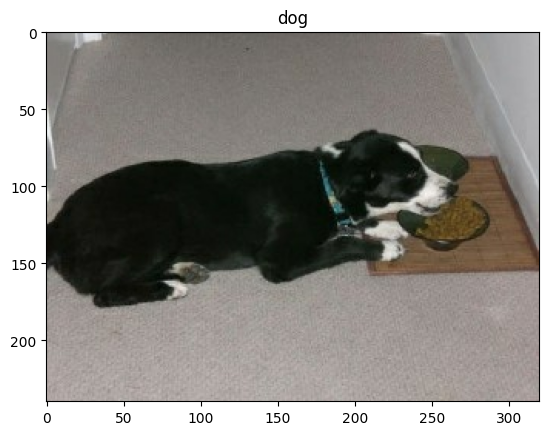

In [19]:
get_label_name = metadata.features['label'].int2str  # creates a function object that we can use to get labels
for image, label in raw_train.take(5):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [9]:
train=raw_train.map(format_image)
test=raw_test.map(format_image)
validation=raw_validation.map(format_image)

In [14]:
print(tf.data.experimental.cardinality(train))
print(tf.data.experimental.cardinality(test))
print(tf.data.experimental.cardinality(validation))


tf.Tensor(18610, shape=(), dtype=int64)
tf.Tensor(2326, shape=(), dtype=int64)
tf.Tensor(2326, shape=(), dtype=int64)


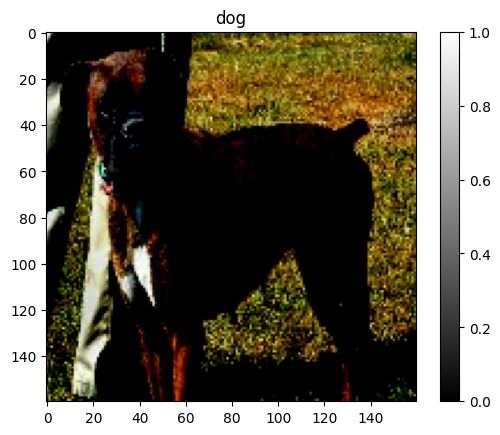

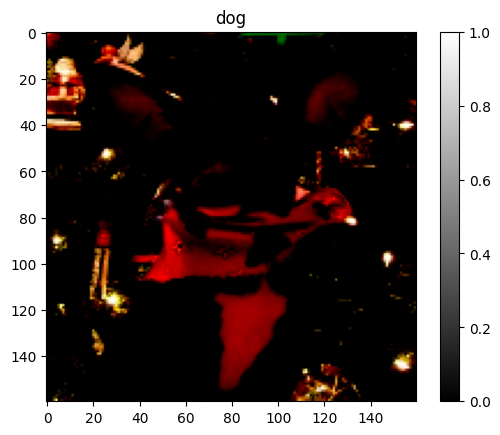

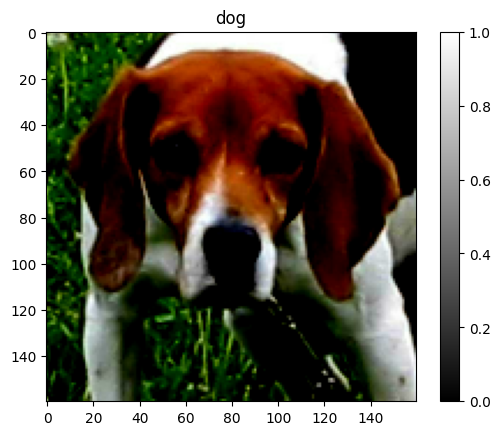

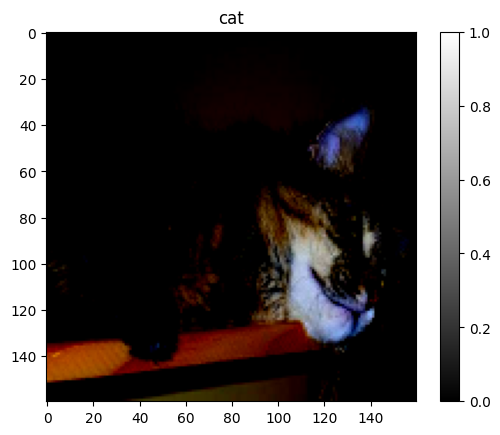

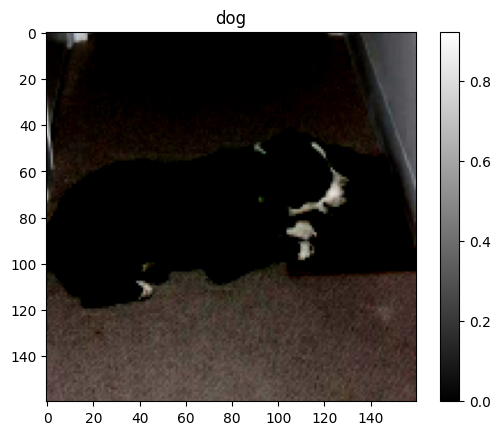

In [24]:
for image,label in train.take(5):
  plt.figure()
  plt.imshow(image, cmap=plt.cm.binary_r)
  plt.colorbar()
  plt.title(get_label_name(label))


In [25]:
#shuffle batches
batch_size=32
train_batch=train.shuffle(1000).batch(batch_size)
test_batch=test.batch(batch_size)
validation_batch=validation.batch(batch_size)

In [27]:
for image,label in raw_train.take(2):
  print("original shape",image.shape)
  #print(label.shape)

for image,label in train_batch.take(2):
  print("updated shape",image.shape)
  #print(label.shape)

original shape (262, 350, 3)
original shape (409, 336, 3)
updated shape (32, 160, 160, 3)
updated shape (32, 160, 160, 3)


In [29]:
IMG_SHAPE=(IMG_size,IMG_size,3)

base_model=tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                             include_top=False,
                                             weights='imagenet')



9406464/9406464 [==============================] - 0s 0us/step


In [32]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

In [33]:
base_model.trainable=False
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

In [37]:
global_layer=tf.keras.layers.GlobalAveragePooling2D() #define the classifier layer
prediction_layer=tf.keras.layers.Dense(1)            # define only 1 dense class

In [40]:
model=tf.keras.Sequential([base_model,global_layer,prediction_layer]) #combine layer to complete the model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [41]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),   #binary sense only 1 class
              metrics=['accuracy'])

In [42]:
# We can evaluate the model right now to see how it does before training it on our new images
initial_epochs = 3
validation_steps=20

loss0,accuracy0 = model.evaluate(validation_batch, steps = validation_steps)

print('accuracy= ',accuracy0)

20/20 [==============================] - 13s 562ms/step - loss: 0.6557 - accuracy: 0.5406
accuracy=  0.5406249761581421


In [43]:
history=model.fit(train_batch,epochs=10,validation_data=validation_batch)

acc=history.history['accuracy']
print(acc)

Epoch 1/10
582/582 [==============================] - 371s 628ms/step - loss: 0.0690 - accuracy: 0.9733 - val_loss: 0.0471 - val_accuracy: 0.9824
Epoch 2/10
582/582 [==============================] - 379s 648ms/step - loss: 0.0431 - accuracy: 0.9838 - val_loss: 0.0442 - val_accuracy: 0.9841
Epoch 3/10
582/582 [==============================] - 372s 636ms/step - loss: 0.0391 - accuracy: 0.9865 - val_loss: 0.0490 - val_accuracy: 0.9824
Epoch 4/10
582/582 [==============================] - 355s 605ms/step - loss: 0.0369 - accuracy: 0.9872 - val_loss: 0.0442 - val_accuracy: 0.9854
Epoch 5/10
582/582 [==============================] - 362s 620ms/step - loss: 0.0343 - accuracy: 0.9879 - val_loss: 0.0454 - val_accuracy: 0.9850
Epoch 6/10
582/582 [==============================] - 349s 594ms/step - loss: 0.0323 - accuracy: 0.9888 - val_loss: 0.0468 - val_accuracy: 0.9837
Epoch 7/10
582/582 [==============================] - 347s 594ms/step - loss: 0.0310 - accuracy: 0.9895 - val_loss: 0.0461 -

In [44]:
model.save("dogs_vs_cats.h5")  # we can save the model and reload it at anytime in the future
new_model = tf.keras.models.load_model('dogs_vs_cats.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
class_names=['cat','dog']

Predictions:
 [0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0]
Labels:
 [0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0]


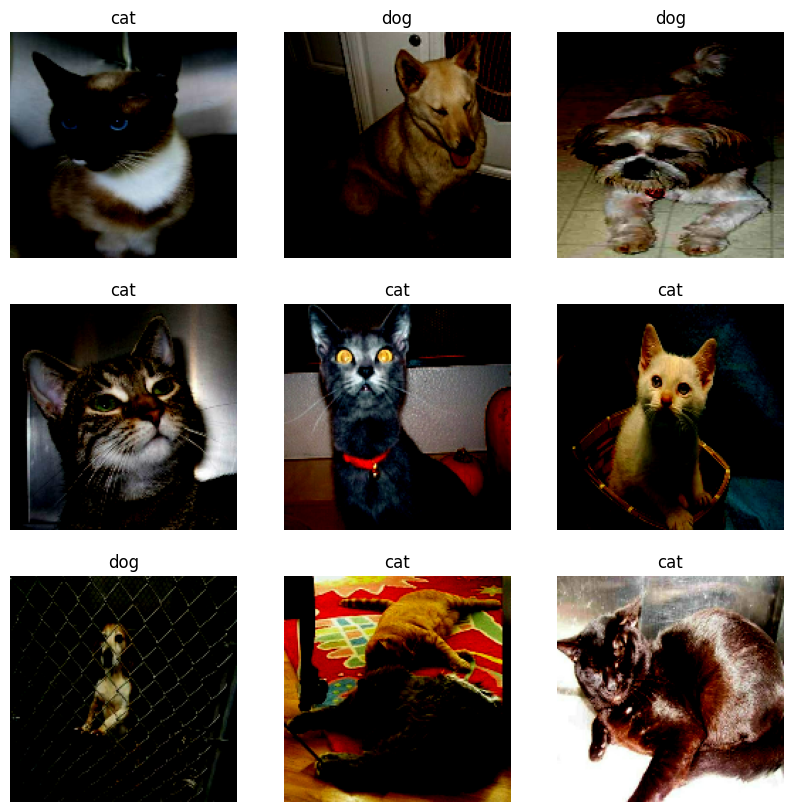

In [57]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_batch.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("float32"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

In [58]:
loss, accuracy = model.evaluate(test_batch)
print('Test accuracy :', accuracy)

73/73 [==============================] - 38s 521ms/step - loss: 0.0493 - accuracy: 0.9811
Test accuracy : 0.9810833930969238
